<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/BBCtext_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/bbc-text.csv')

df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
len(df['category'].unique())

5

In [ ]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'category')

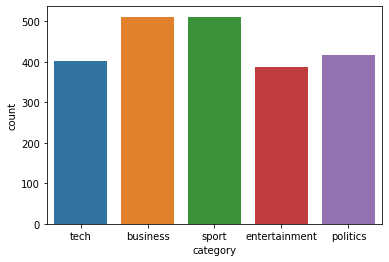

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(df['category'])
plt.xlabel('category')

Data cukup balanced sehingga bisa dijadikan klasifikasi

In [ ]:
# fungsi untuk text cleaning
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
cat = pd.get_dummies(df['category'])
news = pd.concat([df, cat], axis=1)
news = news.drop(columns=['category'])

In [ ]:
news

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [ ]:
X = news['text'].values
Y = news[['business', 'entertainment', 'politics','sport','tech']].values

In [ ]:
X

array(['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in 

In [ ]:
Y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
import numpy as np
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords

porterStemmer = PorterStemmer()

fixed_train_texts = []
for text in X_train:
  removed_text = remove_stopwords(text)   
  removed_text = porterStemmer.stem_sentence(removed_text) 
  fixed_train_texts.append(removed_text)

fixed_train_texts = np.array(fixed_train_texts, dtype='O')  

fixed_test_texts = []
for text in X_test:
  removed_text = remove_stopwords(text)
  removed_text = porterStemmer.stem_sentence(removed_text)
  fixed_test_texts.append(removed_text)

fixed_test_texts = np.array(fixed_test_texts, dtype='O')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)
	 
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)
	 
padded_train = pad_sequences(seq_train) 
padded_test = pad_sequences(seq_test)

word_to_index = tokenizer.word_index

In [ ]:
print(word_to_index)

{'x': 2745, 'the': 2, 'to': 3, 'of': 4, 'and': 5, 'a': 6, 'in': 7, 's': 8, 'for': 9, 'is': 10, 'that': 11, 'it': 12, 'on': 13, 'said': 14, 'was': 15, 'he': 16, 'be': 17, 'with': 18, 'as': 19, 'has': 20, 'have': 21, 'at': 22, 'by': 23, 'will': 24, 'but': 25, 'are': 26, 'i': 27, 'from': 28, 'not': 29, 'they': 30, 'his': 31, 'we': 32, 'mr': 33, 'this': 34, 'an': 35, 'which': 36, 'would': 37, 'had': 38, 'been': 39, 'their': 40, 'more': 41, 'year': 42, 'up': 43, 'its': 44, 'were': 45, 'also': 46, 'who': 47, 'people': 48, 'new': 49, 'us': 50, 'one': 51, 'there': 52, 'about': 53, 'out': 54, 'after': 55, 'can': 56, 'or': 57, 'than': 58, 'all': 59, 'you': 60, 'if': 61, 'could': 62, 'over': 63, 'last': 64, 'first': 65, 't': 66, 'when': 67, 'time': 68, 'two': 69, 'world': 70, 'government': 71, 'other': 72, 'now': 73, 'so': 74, 'what': 75, 'some': 76, 'into': 77, 'uk': 78, 'she': 79, 'years': 80, 'no': 81, 'best': 82, 'them': 83, 'against': 84, 'do': 85, 'only': 86, 'just': 87, 'make': 88, 'being'

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 117,637
Trainable params: 117,637
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 8,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
hist = model.fit(padded_train,Y_train,steps_per_epoch=25,epochs=30,validation_data=(padded_test, Y_test),validation_steps=5,verbose=1, callbacks=[early_stopping_monitor])

Epoch 1/30
25/25 [==============================] - 89s 4s/step - loss: 1.6596 - acc: 0.2343 - val_loss: 1.6113 - val_acc: 0.2112
Epoch 2/30
25/25 [==============================] - 98s 4s/step - loss: 1.5925 - acc: 0.2927 - val_loss: 1.6011 - val_acc: 0.2674
Epoch 3/30
25/25 [==============================] - 98s 4s/step - loss: 1.5563 - acc: 0.3871 - val_loss: 1.5215 - val_acc: 0.3663
Epoch 4/30
25/25 [==============================] - 98s 4s/step - loss: 1.2739 - acc: 0.4478 - val_loss: 1.2525 - val_acc: 0.4607
Epoch 5/30
25/25 [==============================] - 98s 4s/step - loss: 1.1140 - acc: 0.4837 - val_loss: 1.2124 - val_acc: 0.4764
Epoch 6/30
25/25 [==============================] - 99s 4s/step - loss: 1.0402 - acc: 0.5410 - val_loss: 1.1221 - val_acc: 0.5258
Epoch 7/30
25/25 [==============================] - 99s 4s/step - loss: 0.9395 - acc: 0.6079 - val_loss: 1.0632 - val_acc: 0.5618
Epoch 8/30
25/25 [==============================] - 99s 4s/step - loss: 0.8237 - acc: 0.68

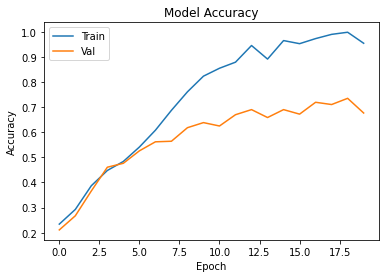

In [ ]:
#Visualize the model accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

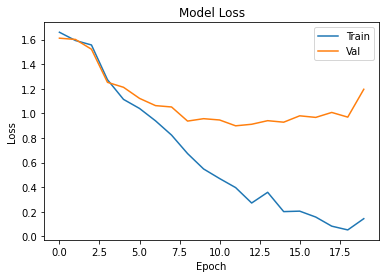

In [ ]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()